# Sea Level Predictor


In [90]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import linregress
df = pd.read_excel('/Users/annaborodina/Library/Containers/com.microsoft.Excel/Data/Downloads/epa-sea-level.xlsx') 
df.head()

,Year,CSIRO Adjusted Sea Level,Lower Error Bound,Upper Error Bound,NOAA Adjusted Sea Level
0,1880,0.000000,-0.952756,0.952756,NaN
1,1881,0.220472,-0.732283,1.173228,NaN
2,1882,-0.440945,-1.346457,0.464567,NaN
3,1883,-0.232283,-1.129921,0.665354,NaN
4,1884,0.590551,-0.283465,1.464567,NaN


[Text(0.5, 0, 'Year'), Text(0, 0.5, 'CSIRO Adjusted Sea Level')]

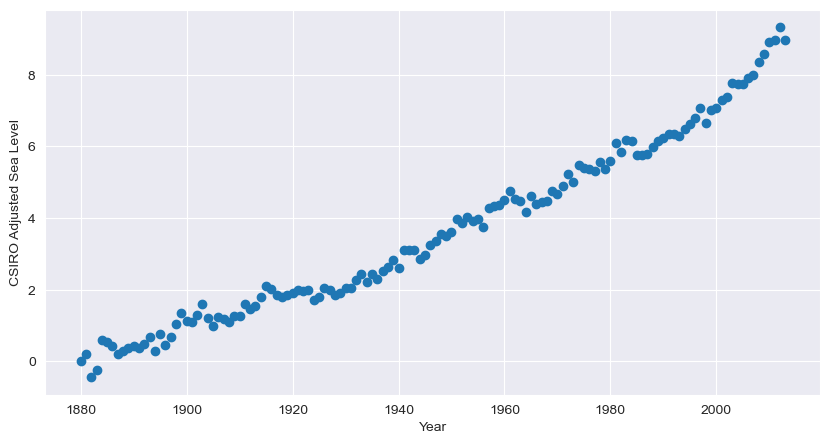

In [64]:
fig ,ax = plt.subplots(figsize = (10,5))
x = df['Year']
y = df['CSIRO Adjusted Sea Level']
ax.scatter(x,y)
ax.set(xlabel = "Year", ylabel = "CSIRO Adjusted Sea Level")

In [77]:
result = linregress(df['Year'], df['CSIRO Adjusted Sea Level'])
result

LinregressResult(slope=0.06304458401213482, intercept=-119.06594196773983, rvalue=0.984757131182585, pvalue=3.7886969791130475e-102, stderr=0.0009692118713287152, intercept_stderr=1.886943381242523)

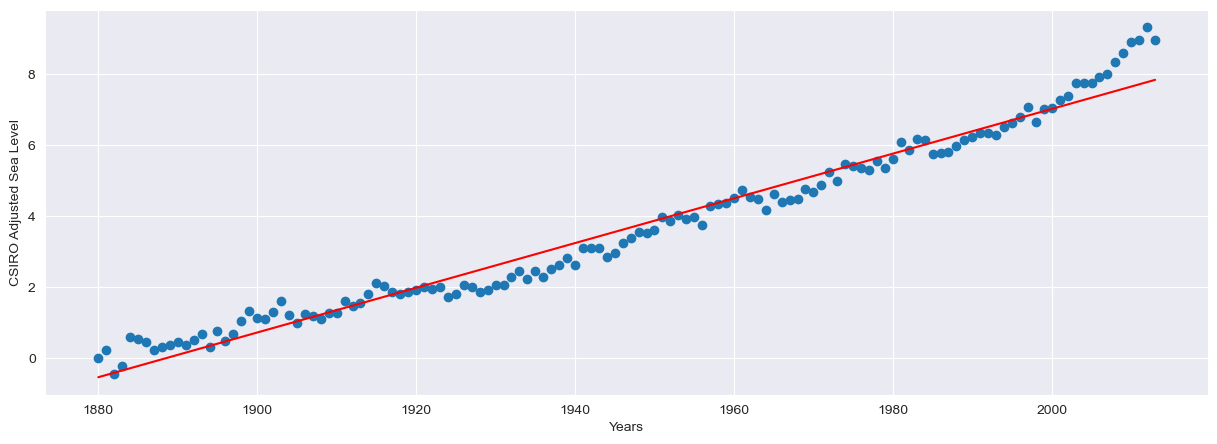

In [80]:
fig ,ax = plt.subplots(figsize = (15,5))
x = df['Year']
y = df['CSIRO Adjusted Sea Level']
ax.scatter(x,y)
ax.set(xlabel = "Years", ylabel = "CSIRO Adjusted Sea Level")
ax.plot(df['Year'],result.slope * df['Year'] + result.intercept,'r')

<Axes: title={'center': 'Rise in Sea Level'}, xlabel='Year', ylabel='Sea Level (inches)'>

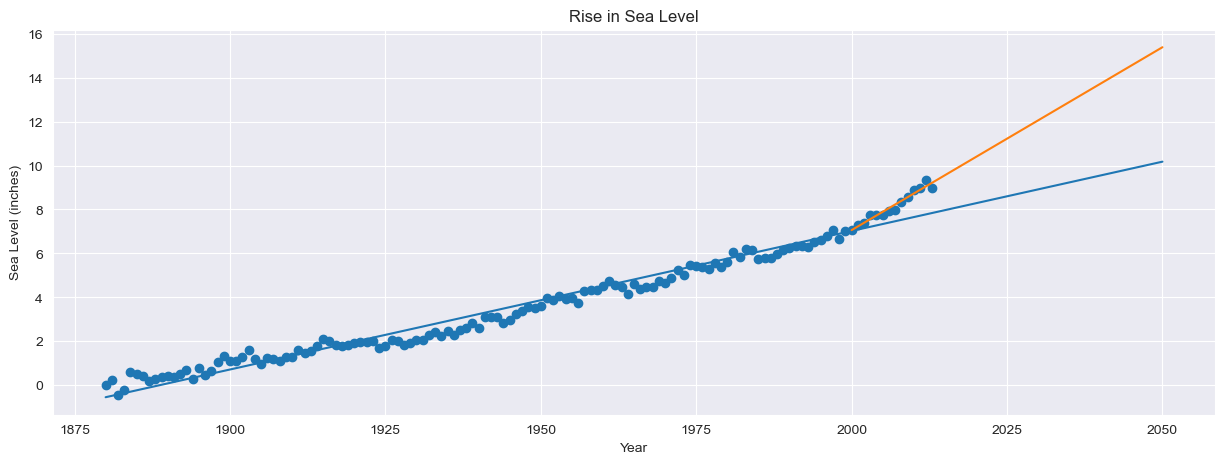

In [122]:
def draw_plot():
    # Read data from file
    df = pd.read_excel('/Users/annaborodina/Library/Containers/com.microsoft.Excel/Data/Downloads/epa-sea-level.xlsx')

    # Create scatter plot
    plt.figure(figsize=(15,5))
    plt.scatter(df['Year'], df['CSIRO Adjusted Sea Level'])
    
    # Create first line of best fit
    line = linregress(df['Year'], df['CSIRO Adjusted Sea Level'])
    plt.plot(range(1880, 2051, 1), line.slope * range(1880, 2051, 1) + line.intercept)

    # Create second line of best fit
    line = linregress(df.query('Year >= 2000')['Year'], 
                              df.query('Year >= 2000')['CSIRO Adjusted Sea Level'])
    plt.plot(range(2000, 2051, 1), line.slope * range(2000, 2051, 1) + line.intercept)

    # Add labels and title
    plt.title('Rise in Sea Level')
    plt.ylabel('Sea Level (inches)')
    plt.xlabel('Year')
    
    

    plt.savefig('sea_level_plot.png')
    return plt.gca()

draw_plot()